In [121]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv
import os   
load_dotenv()

True

In [122]:
class BatmansState(TypedDict):
    run:int
    balls:int
    fours:int
    sixes:int


    strike_rate:float
    balls_per_boundries:float
    boundary_percentage:float
    summary:str

In [123]:
graph = StateGraph(BatmansState)

In [124]:
def calulate_strike_rate(state:BatmansState)->BatmansState:
    runs= state["run"]
    balls= state["balls"]

    strike_rate_caluclator= (runs/balls)*100

    # state["strike_rate"]=strike_rate_caluclator
    return {"strike_rate":strike_rate_caluclator}


In [125]:
def calulate_balls_per_boundries(state:BatmansState)->BatmansState:
    total_balls= state["balls"]
    fours= state["fours"]
    sixes= state["sixes"]

    total_boundries= fours+sixes

    ball_per_boundries= total_balls/total_boundries

    ball_per_boundries=round(ball_per_boundries,2)
    # state["balls_per_boundries"]=ball_per_boundries

    return {"balls_per_boundries":ball_per_boundries}

In [126]:
def calulate_boundary_percentage(state:BatmansState)->BatmansState:
    total_boundries= ((state["fours"] *4 )+(state["sixes"] *6))
    total_runs= state["run"]

    boundary_percentage= (total_boundries/total_runs)*100
    boundary_percentage=round(boundary_percentage,2)
    # state["boundary_percentage"]=boundary_percentage

    return {"boundary_percentage":boundary_percentage}

In [127]:
def summary(state:BatmansState):
    summary = f"""
Strike Rate: {state["strike_rate"]}
Balls per Boundries: {state["balls_per_boundries"]}
Boundary Percentage: {state["boundary_percentage"]}
    """
   
    # state["summary"] = summary
    return {"summary":summary}

In [128]:
## add node
graph.add_node("calulate_strike_rate",calulate_strike_rate)
graph.add_node("calulate_balls_per_boundries",calulate_balls_per_boundries)
graph.add_node("calulate_boundary_percentage",calulate_boundary_percentage)
graph.add_node("summary",summary)

In [129]:
## add edges
graph.add_edge(START,"calulate_strike_rate")
graph.add_edge(START,"calulate_balls_per_boundries")
graph.add_edge(START,"calulate_boundary_percentage")

graph.add_edge("calulate_strike_rate","summary")
graph.add_edge("calulate_balls_per_boundries","summary")
graph.add_edge("calulate_boundary_percentage","summary")

graph.add_edge("summary",END)

In [130]:
workflow = graph.compile()

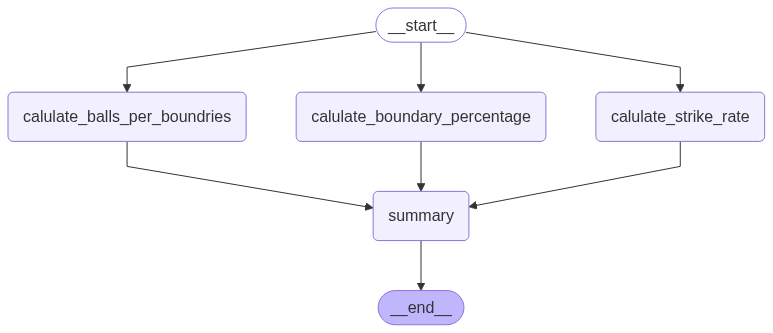

In [131]:
workflow

In [132]:
initial_state = {
    
    "run":120,
    "balls":50,
    "fours":10,
    "sixes":4
}

In [133]:
workflow.invoke(initial_state)

{'run': 120,
 'balls': 50,
 'fours': 10,
 'sixes': 4,
 'strike_rate': 240.0,
 'balls_per_boundries': 3.57,
 'boundary_percentage': 53.33,
 'summary': '\nStrike Rate: 240.0\nBalls per Boundries: 3.57\nBoundary Percentage: 53.33\n    '}